This data analysis project looks at data from the Austin Animal Center from October 1, 2013 to February 17, 2025. A no-kill animal shelter in Austin, Texas that services the city and the surrounded unincorporated county.

# **Data importation, cleaning, and wrangling.**

the Python version used in this project is 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]

 the Pandas version used in this project is 2.2.2

 the Numpy version used in this project is 1.26.4



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#'Animal_Type' and 'Animal ID' converted to category to save memory.
shelter = pd.read_csv('Austin_Animal_Center_Outcomes.csv', dtype={'Animal Type': 'category', 'Animal ID': 'category'})

In [3]:
shelter.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A882831,*Hamilton,07/01/2023 06:12:00 PM,Jul 2023,03/25/2023,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


# **Data Cleaning**


In [4]:
shelter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124127 entries, 0 to 124126
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         124127 non-null  category
 1   Name              88527 non-null   object  
 2   DateTime          124127 non-null  object  
 3   MonthYear         124127 non-null  object  
 4   Date of Birth     124127 non-null  object  
 5   Outcome Type      124096 non-null  object  
 6   Outcome Subtype   57030 non-null   object  
 7   Animal Type       124127 non-null  category
 8   Sex upon Outcome  124125 non-null  object  
 9   Age upon Outcome  124126 non-null  object  
 10  Breed             124127 non-null  object  
 11  Color             124126 non-null  object  
dtypes: category(2), object(10)
memory usage: 15.0+ MB


In [5]:
#Changing formatting of column names
shelter.columns = shelter.columns.str.lower().str.replace(' ', '_')
shelter = shelter.rename(columns={'datetime': 'date_time', 'monthyear': 'month_year'})

In [6]:
#checking for duplicate rows
shelter.duplicated().sum()

19

In [7]:
#dropping duplicates
shelter = shelter.drop_duplicates()

In [8]:
#getting rid of any potential blank spaces
shelter['animal_id'] = shelter.loc[:,'animal_id'].str.strip()

In [9]:
#using sums of the len of animal_id column and filtering the column with a regex to identify all the IDs that fit the columns format.
#hen comparing their sums to ensure that th
print(len(shelter['animal_id']))
print(shelter['animal_id'].str.contains(r"^A\d{6}$", regex=True, na=False).sum())

124108
124108


In [10]:
#Some animal names are missing. Changing from 'NaN' to "Unknown" and removing extra characters such as seen with *Hamilton
shelter['name'] = shelter.loc[:,'name'].fillna('Unknown').str.strip('!@#$%^&*() ')


In [11]:
#appears datetime and monthyear are the same. Investigated below
shelter.head()

,animal_id,name,date_time,month_year,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A882831,Hamilton,07/01/2023 06:12:00 PM,Jul 2023,03/25/2023,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,Unknown,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


In [12]:
#columns using time and dates converted to datetime.
##No code book available. I suspect that time_date and month_year columns are basically duplicates.

shelter['date_time'] = pd.to_datetime(shelter['date_time'].str.strip(), format='mixed', errors='coerce')
shelter['month_year'] = pd.to_datetime(shelter['month_year'].str.strip(),format='mixed', errors='coerce')
shelter['date_of_birth'] = pd.to_datetime(shelter['date_of_birth'].str.strip(), yearfirst=True, errors='coerce')

In [13]:
 #Confirming whether or not date_time and month_year are duplicates.
datetime_year= shelter['date_time'].dt.year
monthyear_year = shelter['month_year'].dt.year
datetime_year.equals(monthyear_year)

True

In [14]:
datetime_mon= shelter['date_time'].dt.month
monthyear_mon = shelter['month_year'].dt.month
datetime_mon.equals(monthyear_mon)

True

Since the columns date_time and month_year are repeatitve, month_year will be dropped due to having slightly less information to offer. Also, due to the substantial amount of missing values in Outcome_Subtype, this column will be dropped as well.

In [15]:
shelter = shelter.drop(columns=['outcome_subtype','month_year'])

In [16]:
shelter.head()

,animal_id,name,date_time,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A882831,Hamilton,2023-07-01 18:12:00,2023-03-25,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,2019-05-08 18:20:00,2017-05-02,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,2018-07-18 16:02:00,2017-07-12,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,Unknown,2020-08-16 11:38:00,2019-08-16,Euthanasia,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,2016-02-13 17:59:00,2015-10-08,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


In [17]:
#date_of_birth has no missing values.
#checking outcome_type for missing or unclean data
print(shelter['outcome_type'].unique())
print('------')
print(shelter['outcome_type'].isna().sum())

['Adoption' 'Rto-Adopt' 'Euthanasia' 'Transfer' 'Return to Owner' 'Died'
 'Disposal' 'Missing' nan 'Relocate' 'Stolen' 'Lost']
------
31


In [18]:
#Find the percentage of data affected by these 42 missing outcomes.
num_rows = (len(shelter))
num_na = shelter['outcome_type'].isna().sum()
f" Missing data in this section represents {(num_na / num_rows) *100} percent of the total column's data."

" Missing data in this section represents 0.0249782447545686 percent of the total column's data."

In [19]:
shelter['outcome_type'].value_counts(normalize=True) *100

,proportion
outcome_type,
Adoption,48.155581
Transfer,28.331601
Return to Owner,15.058391
Euthanasia,6.233226
Died,0.955052
Rto-Adopt,0.693924
Disposal,0.498884
Missing,0.050775
Relocate,0.016925


To preserve as much data as possible for analysis the missing data will be convered to adoptions.

In [20]:
#Changing 'Rto-Adopt' to 'Foster Care' for clarity. According to the animal center this is what 'Rto-Adopt' mean.
shelter['outcome_type'] = shelter.loc[:,'outcome_type'].replace({'Rto-Adopt': 'Foster Care', np.nan : 'Adoption'})

In [21]:
print(shelter['animal_type'].unique())
print('------')
print(shelter['animal_type'].isna().sum())

['Cat', 'Dog', 'Other', 'Bird', 'Livestock']
Categories (5, object): ['Bird', 'Cat', 'Dog', 'Livestock', 'Other']
------
0


In [22]:
print(shelter['sex_upon_outcome'].unique())
print('------')
print(shelter['sex_upon_outcome'].isna().sum())

['Neutered Male' 'Unknown' 'Intact Male' 'Spayed Female' 'Intact Female'
 nan]
------
2


In [23]:
#missing values for 'sex_upon_outcome' replaced with 'Unknown'
shelter['sex_upon_outcome'] = shelter.loc[:,'sex_upon_outcome'].fillna('Unknown')

In [24]:
shelter.head()

,animal_id,name,date_time,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A882831,Hamilton,2023-07-01 18:12:00,2023-03-25,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,2019-05-08 18:20:00,2017-05-02,Foster Care,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,2018-07-18 16:02:00,2017-07-12,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,Unknown,2020-08-16 11:38:00,2019-08-16,Euthanasia,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,2016-02-13 17:59:00,2015-10-08,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


#### **Column Transformation**

Next the 'age_upon_outcome' column will be cleaned and wrangled to ehnance usability. It will not format to datetime and this column has several issues. These issues such as negative number and information that is not very helpful such as "0 years." I will format in days for highest level of precision and then deal with any oddity in data.

In [25]:
shelter['age_upon_outcome'].unique()

array(['3 months', '2 years', '1 year', '4 months', '6 days', '7 years',
       '2 months', '3 years', '2 days', '3 weeks', '11 years', '9 months',
       '4 weeks', '2 weeks', '6 months', '9 years', '10 years', '1 month',
       '8 years', '7 months', '6 years', '4 years', '12 years', '5 years',
       '1 day', '1 weeks', '5 months', '5 days', '15 years', '10 months',
       '4 days', '16 years', '8 months', '13 years', '1 week', '14 years',
       '11 months', '3 days', '0 years', '5 weeks', '17 years',
       '18 years', '20 years', '22 years', '-2 years', '19 years',
       '28 years', '-3 years', '23 years', nan, '25 years', '30 years',
       '-1 years', '24 years', '21 years', '-4 years'], dtype=object)

In [26]:
shelter['age_upon_outcome'].isnull().sum()

1

I will split 'age_upon_outcome' into two columns for temporary use. I will standardize the age into day and years to maximize percision and readability.

In [27]:
#Will make NaN's '0' so that I can change the type of the data in this column from object to str.
#Will later fill in zeros with average of column
shelter['age_upon_outcome'] = shelter['age_upon_outcome'].fillna(0)

In [28]:
#create new columns
shelter[['num', 'time_unit']] = shelter['age_upon_outcome'].astype(str).str.split(' ', expand=True)

In [29]:
#convert object type data to intergers for 'num' and str for 'time_unit'
shelter['num'] = shelter['num'].astype(int)

In [30]:
#I'm using np.select() to convert data to days. abs() used to deal with negative intergers
#to_datetime method malfunctions with this data after trying np.select() will keep new columns as ints and floats.
conditions = [
    shelter['time_unit'] == 'day',
    shelter['time_unit'] == 'days',
    shelter['time_unit'] == 'week',
    shelter['time_unit'] == 'weeks',
    shelter['time_unit'] == 'month',
    shelter['time_unit'] == 'months',
    shelter['time_unit'] == 'year',
    shelter['time_unit'] ==  'years',
    ]

operations = [
    abs(shelter['num'] * 1),
    abs(shelter['num'] * 1),
    abs(shelter['num'] * 7),
    abs(shelter['num'] * 7),
    abs(shelter['num'] * 30),
    abs(shelter['num'] * 30),
    abs(shelter['num'] * 365),
    abs(shelter['num'] * 365),
    ]

shelter['age_upon_outcome_days'] = np.select(conditions, operations, default=0)

In [31]:
#take missing values found earlier and convert from zero to the average for this column
shelter['age_upon_outcome_days'] = shelter['age_upon_outcome_days'].replace(0, shelter['age_upon_outcome_days'].mean())

In [32]:
# add column outcome in years
shelter['outcome_age_by_years'] = shelter['age_upon_outcome_days'].apply(lambda x: x / 365)

In [33]:
#checking work
shelter.head()

,animal_id,name,date_time,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,num,time_unit,age_upon_outcome_days,outcome_age_by_years
0,A882831,Hamilton,2023-07-01 18:12:00,2023-03-25,Adoption,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White,3,months,90.0,0.246575
1,A794011,Chunk,2019-05-08 18:20:00,2017-05-02,Foster Care,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,years,730.0,2.000000
2,A776359,Gizmo,2018-07-18 16:02:00,2017-07-12,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,1,year,365.0,1.000000
3,A821648,Unknown,2020-08-16 11:38:00,2019-08-16,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,1,year,365.0,1.000000
4,A720371,Moose,2016-02-13 17:59:00,2015-10-08,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,4,months,120.0,0.328767


In [34]:
#int days and round years
shelter['age_upon_outcome_days'] = shelter['age_upon_outcome_days'].astype(int)
shelter['outcome_age_by_years'] = shelter['outcome_age_by_years'].round(2)

In [35]:
#drop columns that are now unnecessary
shelter = shelter.drop(columns=['age_upon_outcome', 'num', 'time_unit'])

In [36]:
#reorder 'age_upon_outcome_days' column for better readability
column_days_to_move = shelter.pop('age_upon_outcome_days')
column_years_to_move = shelter.pop('outcome_age_by_years')
shelter.insert(6,'age_upon_outcome_days', column_days_to_move)
shelter.insert(7,'age_upon_outcome_years', column_years_to_move)

#### Data Cleaning Continuted

In [37]:
shelter.head()

,animal_id,name,date_time,date_of_birth,outcome_type,animal_type,age_upon_outcome_days,age_upon_outcome_years,sex_upon_outcome,breed,color
0,A882831,Hamilton,2023-07-01 18:12:00,2023-03-25,Adoption,Cat,90,0.25,Neutered Male,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,2019-05-08 18:20:00,2017-05-02,Foster Care,Cat,730,2.00,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,2018-07-18 16:02:00,2017-07-12,Adoption,Dog,365,1.00,Neutered Male,Chihuahua Shorthair Mix,White/Brown
3,A821648,Unknown,2020-08-16 11:38:00,2019-08-16,Euthanasia,Other,365,1.00,Unknown,Raccoon,Gray
4,A720371,Moose,2016-02-13 17:59:00,2015-10-08,Adoption,Dog,120,0.33,Neutered Male,Anatol Shepherd/Labrador Retriever,Buff


In [38]:
print(shelter['breed'].unique())
print('------')
print(shelter['breed'].isna().sum())

['Domestic Shorthair Mix' 'Chihuahua Shorthair Mix' 'Raccoon' ...
 'Cardigan Welsh Corgi/English Setter'
 'Scottish Terrier/Standard Schnauzer' 'Dobe']
------
0


In [39]:
shelter.loc[shelter['breed'].str.contains('Mix'), 'breed'].value_counts()

,count
breed,
Domestic Shorthair Mix,25106
Pit Bull Mix,7385
Labrador Retriever Mix,6295
Chihuahua Shorthair Mix,5088
German Shepherd Mix,2937
...,...
Conure Mix,1
Alaskan Klee Kai Mix,1
Chartreux Mix,1


In the breed column, 'Mix' does not add much value since it does not specify what the animal is mixed with. Mixed will be removed to allow it to be completely recognized with the breed is identified as being part of. Known mixes are specified with "/".

In [40]:
# Using boolean indexing to select rows containing 'Mix' in 'breed' column.
# Then apply the replace method to those specific rows.
shelter.loc[shelter['breed'].str.contains('Mix'), 'breed'] = shelter.loc[shelter['breed'].str.contains('Mix'), 'breed'].str.replace('Mix', '')

In [41]:
#Will leave column as is mostly is for now. Some values could be condensed or split into multple columns in the future for machine learning

#Please see aac_bread_color.csv for output

#for i in shelter['breed'].unique():
#  print(i)

In [42]:
#Will leave column as is for now. Some values could be condensed or split into multple columns in the future for machine learning

#Please see aac_bread_color.csv for output

#print(shelter['color'].unique())

In [43]:
#view DF's updated info / check for any remaining NaN's
shelter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124108 entries, 0 to 124126
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   animal_id               124108 non-null  object        
 1   name                    124108 non-null  object        
 2   date_time               124108 non-null  datetime64[ns]
 3   date_of_birth           124108 non-null  datetime64[ns]
 4   outcome_type            124108 non-null  object        
 5   animal_type             124108 non-null  category      
 6   age_upon_outcome_days   124108 non-null  int64         
 7   age_upon_outcome_years  124108 non-null  float64       
 8   sex_upon_outcome        124108 non-null  object        
 9   breed                   124108 non-null  object        
 10  color                   124107 non-null  object        
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 10.5+ MB


In [44]:
cleaned_shelter = shelter.reset_index()

#**Exploratory Analysis**

In this section of the project the data from all the years listed in the data will be examined.



In [45]:
cleaned_shelter.head()

,index,animal_id,name,date_time,date_of_birth,outcome_type,animal_type,age_upon_outcome_days,age_upon_outcome_years,sex_upon_outcome,breed,color
0,0,A882831,Hamilton,2023-07-01 18:12:00,2023-03-25,Adoption,Cat,90,0.25,Neutered Male,Domestic Shorthair,Black/White
1,1,A794011,Chunk,2019-05-08 18:20:00,2017-05-02,Foster Care,Cat,730,2.00,Neutered Male,Domestic Shorthair,Brown Tabby/White
2,2,A776359,Gizmo,2018-07-18 16:02:00,2017-07-12,Adoption,Dog,365,1.00,Neutered Male,Chihuahua Shorthair,White/Brown
3,3,A821648,Unknown,2020-08-16 11:38:00,2019-08-16,Euthanasia,Other,365,1.00,Unknown,Raccoon,Gray
4,4,A720371,Moose,2016-02-13 17:59:00,2015-10-08,Adoption,Dog,120,0.33,Neutered Male,Anatol Shepherd/Labrador Retriever,Buff


In [46]:
cleaned_shelter.describe()

,index,date_time,date_of_birth,age_upon_outcome_days,age_upon_outcome_years
count,124108.000000,124108,124108,124108.000000,124108.000000
mean,62063.721485,2018-09-03 17:35:38.388822528,2016-07-29 08:30:57.839945728,728.234691,1.994801
min,0.000000,2013-10-01 09:31:00,1991-09-22 00:00:00,1.000000,0.000000
25%,31033.750000,2016-01-07 16:35:15,2014-02-14 00:00:00,60.000000,0.160000
50%,62063.500000,2018-06-11 18:40:30,2016-08-28 00:00:00,365.000000,1.000000
75%,93093.250000,2021-04-14 12:13:30,2019-08-02 00:00:00,730.000000,2.000000
max,124126.000000,2024-09-30 16:00:00,2024-09-20 00:00:00,10950.000000,30.000000
std,35831.850993,NaN,NaN,1025.171269,2.808920


Type and number of animals that have been in the shelter over the span of the data.



In [47]:
cleaned_shelter['animal_type'].value_counts()

,count
animal_type,
Dog,67820
Cat,49187
Other,6453
Bird,628
Livestock,20


Top 5 outcomes for the animals.

In [48]:
cleaned_shelter['outcome_type'].value_counts().nlargest(5)

,count
outcome_type,
Adoption,59781
Transfer,35153
Return to Owner,18684
Euthanasia,7734
Died,1185


Count and average age of animal upon outcome


In [49]:
cleaned_shelter.pivot_table(values='age_upon_outcome_years', index='outcome_type', columns='animal_type', aggfunc=['count'], observed=False, margins=True)

count                                      
animal_type      Bird    Cat    Dog Livestock Other     All
outcome_type                                               
Adoption          225  25073  33773         9   701   59781
Died               21    707    282         1   174    1185
Disposal           28    117     66         0   408     619
Euthanasia        106   1792   1572         1  4263    7734
Foster Care         0    181    677         0     3     861
Lost                1      0      1         0     0       2
Missing             1     36     21         0     5      63
Relocate            8      4      0         0     9      21
Return to Owner    43   2047  16528         4    62   18684
Stolen              0      0      5         0     0       5
Transfer          195  19230  14895         5   828   35153
All               628  49187  67820        20  6453  124108

In [50]:
cleaned_shelter.pivot_table(values=['age_upon_outcome_years'], index='outcome_type', columns='animal_type', aggfunc=['mean'], observed=False, margins=True)

mean                                \
                age_upon_outcome_years                                 
animal_type                       Bird       Cat       Dog Livestock   
outcome_type                                                           
Adoption                      1.388222  1.128941  1.913918  1.444444   
Died                          1.293333  1.291132  2.583901  0.040000   
Disposal                      1.097143  1.945726  2.632576       NaN   
Euthanasia                    1.294811  3.177584  4.450980  0.080000   
Foster Care                        NaN  3.519503  3.194298       NaN   
Lost                          2.000000       NaN  0.250000       NaN   
Missing                       1.000000  1.211389  1.879524       NaN   
Relocate                      0.788750  5.062500       NaN       NaN   
Return to Owner               1.373721  4.101812  3.882986  1.205000   
Stolen                             NaN       NaN  4.364000       NaN   
Transfer                      1.629436  1.135505  2.208087  1.516000   
All                           1.422930  1.343317  2.533613  1.276000   

                                     
                                     
animal_type         Other       All  
outcome_type                         
Adoption         1.286362  1.575279  
Died             1.145287  1.576346  
Disposal         1.284338  1.544637  
Euthanasia       1.387415  2.423461  
Foster Care      2.000000  3.258502  
Lost                  NaN  1.125000  
Missing          0.346000  1.362063  
Relocate         0.846667  1.627619  
Return to Owner  2.888871  3.897314  
Stolen                NaN  4.364000  
Transfer         1.224915  1.594879  
All              1.355690  1.994801

In [51]:
cleaned_shelter.groupby(['animal_type', 'sex_upon_outcome'], observed=False)['age_upon_outcome_years'].mean()

animal_type  sex_upon_outcome
Bird         Intact Female       2.230583
             Intact Male         1.466550
             Neutered Male            NaN
             Spayed Female            NaN
             Unknown             1.166864
Cat          Intact Female       0.862571
             Intact Male         0.629580
             Neutered Male       1.690949
             Spayed Female       1.713061
             Unknown             0.691461
Dog          Intact Female       2.075639
             Intact Male         2.282584
             Neutered Male       2.698312
             Spayed Female       2.600669
             Unknown             1.052899
Livestock    Intact Female       1.496250
             Intact Male         2.500000
             Neutered Male       1.000000
             Spayed Female            NaN
             Unknown             0.838889
Other        Intact Female       1.472108
             Intact Male         1.447023
             Neutered Male       1.606875
             Spayed Female       1.644414
             Unknown             1.323023
Name: age_upon_outcome_years, dtype: float64

In [52]:
cleaned_shelter['breed'].value_counts().nlargest(10)

,count
breed,
Domestic Shorthair,25106
Domestic Shorthair,15799
Pit Bull,7385
Labrador Retriever,6295
Chihuahua Shorthair,5088
German Shepherd,2937
Domestic Medium Hair,2504
Pit Bull,2311
Bat,1676


In [53]:
dogs_cats = cleaned_shelter[cleaned_shelter['animal_type'].isin(['Dog', 'Cat'])]


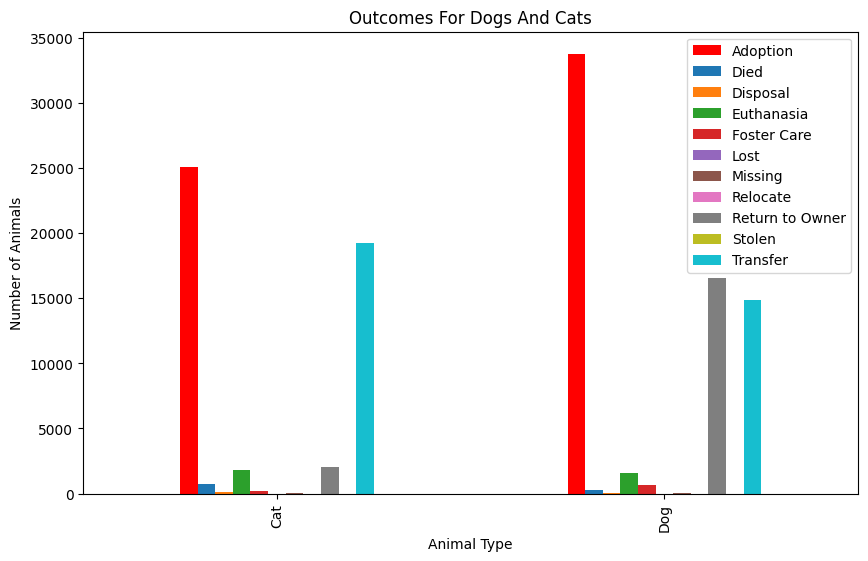

In [54]:
plot_data = dogs_cats.groupby(['animal_type', 'outcome_type'], observed=True).size().unstack()

# Create a dictionary of colors where you specify a different color for the item you want to change
# For example, to make 'Adoption' red while keeping others default colors:
colors = {col: 'red' if col == 'Adoption' else None for col in plot_data.columns}

# Create the bar chart with custom colors
ax = plot_data.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Outcomes For Dogs And Cats')
plt.ylabel('Number of Animals')
plt.xlabel('Animal Type')
plt.legend(loc='upper right')
plt.show()

In [55]:
cleaned_shelter.head(1)

,index,animal_id,name,date_time,date_of_birth,outcome_type,animal_type,age_upon_outcome_days,age_upon_outcome_years,sex_upon_outcome,breed,color
0,0,A882831,Hamilton,2023-07-01 18:12:00,2023-03-25,Adoption,Cat,90,0.25,Neutered Male,Domestic Shorthair,Black/White


In [56]:
adopted = cleaned_shelter[cleaned_shelter['outcome_type']=='Adoption']

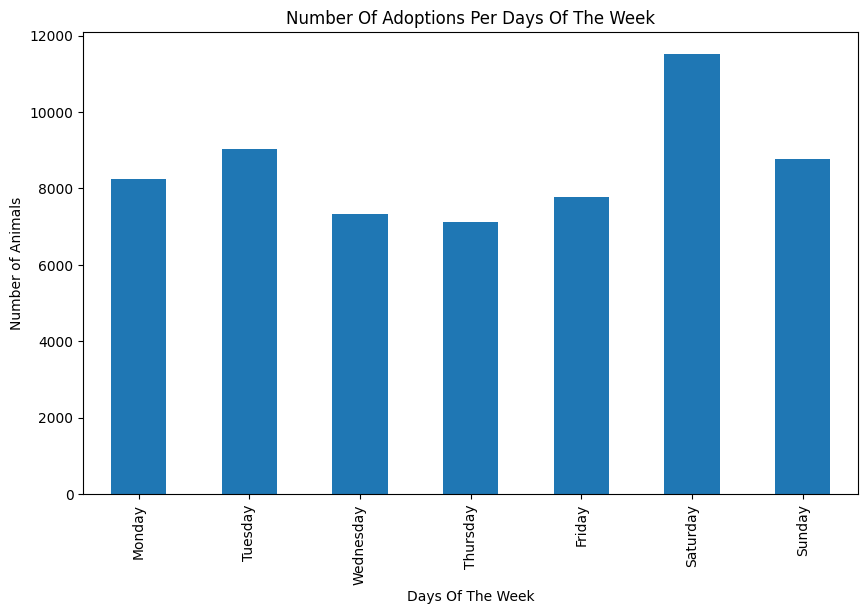

In [57]:
#copy of adopted created for stability, prevents user warning
adopted = adopted.copy()

plot_data = adopted.groupby(adopted['date_time'].dt.day_name(), observed=True)['animal_id'].count()

# Defining the desired order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Converting 'date_time' to day names and then to an ordered categorical type
adopted['day_of_week'] = pd.Categorical(adopted.loc[:,'date_time'].dt.day_name(), categories=day_order, ordered=True)

# Group by the ordered categorical day_of_week
plot_data = adopted.groupby('day_of_week', observed=True)['animal_id'].count()

ax = plot_data.plot(kind='bar', figsize=(10, 6))

plt.title('Number Of Adoptions Per Days Of The Week')
plt.ylabel('Number of Animals')
plt.xlabel('Days Of The Week')
plt.show()

### Animals divided by those who made one visit to the shelter vs more than one.

In [58]:
one_time_visitor =cleaned_shelter[~cleaned_shelter['animal_id'].duplicated()]

In [59]:
frequent_visitors = cleaned_shelter[cleaned_shelter['animal_id'].duplicated()]

Number of animals that were seen at the shelter once by animal type.

In [60]:
one_time_visitor.groupby('animal_type', observed=True).size()

,0
animal_type,
Bird,628
Cat,47480
Dog,59556
Livestock,20
Other,6432


In [61]:
one_time_visitor.groupby('outcome_type', observed=True).size()

,0
outcome_type,
Adoption,54200
Died,1173
Disposal,615
Euthanasia,7610
Foster Care,709
Lost,2
Missing,56
Relocate,21
Return to Owner,15638


Number of animals seen more than once at the animal shelter. We can see the highest number were dogs.

In [62]:
frequent_visitors.groupby('animal_type', observed=True).size()

,0
animal_type,
Cat,1707
Dog,8264
Other,21


In [63]:
frequent_visitors.groupby('outcome_type', observed=True).size()

,0
outcome_type,
Adoption,5581
Died,12
Disposal,4
Euthanasia,124
Foster Care,152
Missing,7
Return to Owner,3046
Stolen,1
Transfer,1065


The animals that were seen the most.

In [64]:
frequent_visitors.groupby('animal_type', observed=True).max()

,index,animal_id,name,date_time,date_of_birth,outcome_type,age_upon_outcome_days,age_upon_outcome_years,sex_upon_outcome,breed,color
animal_type,,,,,,,,,,,
Cat,124107,A912946,Zula,2024-09-28 14:19:00,2024-06-06,Transfer,6570,18.0,Unknown,Snowshoe,White/White
Dog,124122,A913631,Zymba,2024-09-29 00:00:00,2024-07-24,Transfer,7300,20.0,Unknown,Yorkshire Terrier/Standard Poodle,Yellow/White
Other,119687,A903665,Unknown,2024-07-11 12:00:00,2022-11-01,Transfer,5475,15.0,Unknown,Tortoise,White/Tan
